# Step by step guide how to run a simple example with Poincaré maps.

In [1]:
import scanpy.api as sc
import pandas as pd
import numpy as np

from main import *
from poincare_maps import *

%matplotlib inline


/Users/klanna/anaconda3/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [2]:
dataset_fullpath = './datasets/ToggleSwitch'
features, labels = prepare_data(dataset_fullpath, 
                                with_labels=True, 
                                normalize=True, 
                                n_pca=0)

loss: 1.86982:   0%|                           | 4/1000 [00:00<00:25, 38.99it/s]

Computing laplacian...
Laplacian computed in 0.00 sec
Computing RFA...
RFA computed in 0.01 sec
batchsize =  20
Starting training...


loss: 0.06124:  30%|███████▌                 | 300/1000 [00:06<00:14, 49.00it/s]


Stopped at epoch 301
PM computed in 6.28 sec


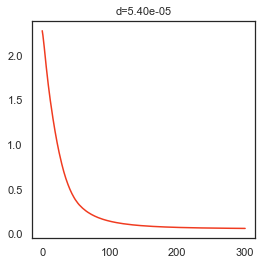

loss = 6.124e-02
time = 0.107 min


<Figure size 432x288 with 0 Axes>

In [5]:
poincare_coord, _ = compute_poincare_maps(features, labels,
                        'results/example',
                        mode='features', k_neighbours=15, 
                        distlocal='minkowski', sigma=1.0, gamma=2.0,
                        color_dict=None, epochs=1000,
                        batchsize=-1, lr=0.1, earlystop=0.0001, cuda=0)

In [6]:
np.savetxt('results/example.csv', poincare_coord, delimiter=",")

# Plotting

After Poincaré maps coordinates are computed, we can set up a new variable for pretty plots.

In [7]:
model = PoincareMaps(poincare_coord)

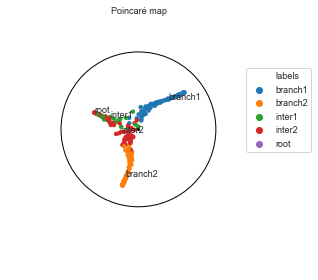

In [8]:
model.plot('ori', labels=labels, file_name='results/example', 
           title_name='Poincaré map', 
           coldict=None, 
           labels_order=None, 
           zoom=None, bbox=(1.1, 0.8))


We can also rotate Poincaré map with respect to a designated root

In [9]:
model.iroot = poincare_root('root', labels, features) 
# we could also just explicitly say with respect to each point we want the rotation (via index of this point), 
# e.g. model.iroot = 0

model.rotate()

## Plotting functions in Poincaré maps have several parameters to tweak for more visually appealing figures:

coldict - you can specify explicitly a dictionary with colors you want to use. Keys in the dictionary correspond to labels categories

d1, d2 - define the size of the figure

fs - defines font size of the text

alpha - tranpsarency of the dots
ms - size of the dots

bbox - box of the legend

print_labels - you can specify if you want the labels to appear on your plot

file_name - full path to the file where you want to save your figure. If None the figure won't be saved.

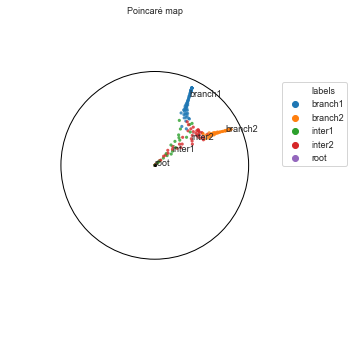

In [10]:
# now we can easily plot the rotation
model.plot('rot', labels=labels, file_name='results/example_rotated', 
           title_name='Poincaré map', 
           coldict=None, 
           d1=5, d2=5, fs=9, ms=10, alpha=0.8,
           labels_order=None, 
           print_labels = True,
           zoom=None, bbox=(1.1, 0.8))
